# Looking into different simple linear regression methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
from scipy.stats import linregress
from statsmodels.regression.linear_model import OLS

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Make X and y data

In [4]:
amount_of_features = 4
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [5]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

# Scipy

In [6]:
if amount_of_features == 1:
    res=linregress(x=X.reshape(1,-1), y=y)
    res

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
    _ = plt.legend()

# Sklearn

In [7]:
reg = LinearRegression().fit(X, y)

In [8]:
reg.coef_, reg.intercept_, reg.score(X, y)

(array([86.70482673,  5.68738212, 27.05974096, 40.58492471]),
 -0.0391720867097618,
 0.9970869093696945)

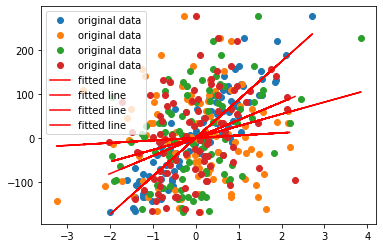

In [9]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, reg.intercept_ + reg.coef_*X, 'r', label='fitted line')
_ = plt.legend()

# Statsmodels

In [10]:
res = OLS(endog=y, exog=statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip')).fit()

In [11]:
res.params

array([-3.91720867e-02,  8.67048267e+01,  5.68738212e+00,  2.70597410e+01,
        4.05849247e+01])

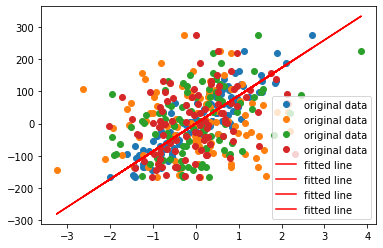

In [12]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, res.params[0] + res.params[1]*X, 'r', label='fitted line')
_ = plt.legend()

# Manual version using numpy

In [13]:
if amount_of_features == 1:
    x = X.reshape(1,-1)

    n = len(x)
    xmean = np.mean(x, None)
    ymean = np.mean(y, None)

    # Average sums of square differences from the mean
    #   ssxm = mean( (x-mean(x))^2 )
    #   ssxym = mean( (x-mean(x)) * (y-mean(y)) )
    ssxm, ssxym, _, ssym = np.cov(x, y, bias=1).flat

    slope = ssxym / ssxm
    intercept = ymean - slope*xmean

    # slope, intercept

    # np.vstack([x, np.ones(len(x))]).T

    # intercept, slope = np.linalg.lstsq(statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip'), y, rcond=None)[0]
    # slope, intercept

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, intercept + slope*X, 'r', label='fitted line')
    _ = plt.legend()

In [14]:
# np.dot(x, y)
# np.matmul(X,y)

In [15]:
# X / y.reshape(-1,1)

## Learning matrix multiplication to achieve linear regression output

https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

Add ones in case you wish to have the intercept returned

In [16]:
X[0:5].T

array([[ 0.85243333, -0.49300093, -1.1429703 ,  0.37569802, -1.19620662],
       [-0.66178646, -0.20812225,  0.05820872, -1.15099358, -1.10633497],
       [ 0.18645431, -0.62269952,  0.15372511,  0.11092259, -0.18565898],
       [-2.02514259,  0.28099187, -0.88385744, -0.54438272, -0.47917424]])

In [17]:
np.ones(len(X[0:5]))

array([1., 1., 1., 1., 1.])

In [18]:
x = np.vstack([np.ones(len(X)), X.T#.reshape(1,-1)
              ]
             ).T
x[0:5]

array([[ 1.        ,  0.85243333, -0.66178646,  0.18645431, -2.02514259],
       [ 1.        , -0.49300093, -0.20812225, -0.62269952,  0.28099187],
       [ 1.        , -1.1429703 ,  0.05820872,  0.15372511, -0.88385744],
       [ 1.        ,  0.37569802, -1.15099358,  0.11092259, -0.54438272],
       [ 1.        , -1.19620662, -1.10633497, -0.18565898, -0.47917424]])

Step 1: X`X

In [19]:
np.matmul(x.transpose(1,0), x)

array([[100.        ,   4.37641733,   2.24956986,   3.37458003,
         -0.98112288],
       [  4.37641733,  95.70624341,  -3.76647012,  12.82009733,
         -1.73070154],
       [  2.24956986,  -3.76647012, 107.95712708,  -3.23772973,
          1.56998234],
       [  3.37458003,  12.82009733,  -3.23772973,  89.88206826,
         -1.37435278],
       [ -0.98112288,  -1.73070154,   1.56998234,  -1.37435278,
         74.60970248]])

Step 2: (X`X)^-1

In [20]:
np.linalg.inv(np.matmul(x.transpose(1,0), x))

array([[ 0.01003589, -0.0004227 , -0.00023532, -0.00032313,  0.00012117],
       [-0.0004227 ,  0.01068484,  0.00033379, -0.00149293,  0.00020777],
       [-0.00023532,  0.00033379,  0.00929097,  0.00029307, -0.00018546],
       [-0.00032313, -0.00149293,  0.00029307,  0.01136383,  0.00016428],
       [ 0.00012117,  0.00020777, -0.00018546,  0.00016428,  0.01341642]])

Step 3: X`Y

In [21]:
np.matmul(x.transpose(1,0), y)

array([ 439.82992453, 8553.26858454,  263.4396618 , 3469.42540198,
       2849.74687256])

Step 4 (put it all together): (X'X)^-1 X'Y

In [22]:
X_trans_X_inv = np.linalg.inv(np.matmul(x.transpose(1,0), x))
X_trans_y = np.matmul(x.transpose(1,0), y)

results = np.dot(X_trans_X_inv, X_trans_y)

np.set_printoptions(suppress=True)
results

array([-0.03917209, 86.70482673,  5.68738212, 27.05974096, 40.58492471])

In [23]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

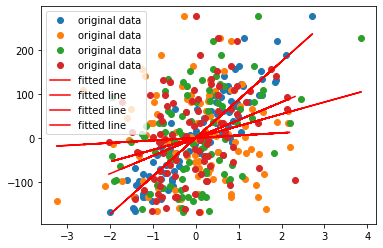

In [24]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, results[0] + results[1:len(results)]*X, 'r', label='fitted line')
_ = plt.legend()

## Learning matrix multiplication to achieve linear mixed models output

https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/

https://en.wikipedia.org/wiki/Mixed_model

Add ones in case you wish to have the intercept returned